In [26]:
#import required libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam, SGD

from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report


In [5]:
#import Data
df = pd.read_csv('kc_house_data.csv')
df.head(5).T

,0,1,2,3,4
id,7129300520,6414100192,5631500400,2487200875,1954400510
date,20141013T000000,20141209T000000,20150225T000000,20141209T000000,20150218T000000
price,221900.0,538000.0,180000.0,604000.0,510000.0
bedrooms,3,3,2,4,3
bathrooms,1.0,2.25,1.0,3.0,2.0
sqft_living,1180,2570,770,1960,1680
sqft_lot,5650,7242,10000,5000,8080
floors,1.0,2.0,1.0,1.0,1.0
waterfront,0,0,0,0,0
view,0,0,0,0,0


In [8]:
df['price'].value_counts()

350000.0     172
450000.0     172
550000.0     159
500000.0     152
425000.0     150
            ... 
607010.0       1
1362500.0      1
298800.0       1
957500.0       1
402101.0       1
Name: price, Length: 4028, dtype: int64

In [9]:
# drop some unnecessary columns
df = df.drop(['date','id','zipcode'],axis=1)

In [10]:
X = df.drop('price',axis =1).values
y = df['price'].values
#splitting Train and Test 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [11]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(14480, 17)
(14480,)
(7133, 17)
(7133,)


In [13]:
sc=StandardScaler()

X_train = sc.fit_transform(X_train.astype(np.float))
X_test = sc.transform(X_test.astype(np.float))

<ipython-input-13-8d00e81bcf02>:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_train = sc.fit_transform(X_train.astype(np.float))
<ipython-input-13-8d00e81bcf02>:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_test = sc.transform(X_test.astype(np.float))


In [17]:
model = tf.keras.Sequential([tf.keras.layers.Dense(30, 
                            activation = 'relu', input_shape = X_train.shape[1:]),
                            tf.keras.layers.Dense(1)])

In [27]:
model= Sequential()
model.add(Dense(64,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(1)) #If you don't specify anything, no activation is applied (ie. "linear" activation: a(x) = x).
model.compile(optimizer='sgd',loss=tf.keras.losses.MeanAbsoluteError())

In [21]:
model.compile(loss = tf.losses.mean_squared_error,
             optimizer = 'sgd', metrics=['mean_squared_error'])

In [28]:
history = model.fit(x=X_train,y=y_train, validation_split=0.1,
          batch_size=128,epochs=100)

Epoch 1/100
102/102 [==============================] - 1s 3ms/step - loss: 541212.0000 - val_loss: 526652.4375
Epoch 2/100
102/102 [==============================] - 0s 2ms/step - loss: 498794.7500 - val_loss: 529040.3750
Epoch 3/100
102/102 [==============================] - 0s 2ms/step - loss: 541290.8125 - val_loss: 529039.2500
Epoch 4/100
102/102 [==============================] - 0s 2ms/step - loss: 541289.6875 - val_loss: 529038.2500
Epoch 5/100
102/102 [==============================] - 0s 2ms/step - loss: 541288.6875 - val_loss: 529037.2500
Epoch 6/100
102/102 [==============================] - 0s 2ms/step - loss: 541287.6875 - val_loss: 529036.1875
Epoch 7/100
102/102 [==============================] - 0s 2ms/step - loss: 541286.6875 - val_loss: 529035.2500
Epoch 8/100
102/102 [==============================] - 0s 2ms/step - loss: 541285.6250 - val_loss: 529034.1875
Epoch 9/100
102/102 [==============================] - 0s 2ms/step - loss: 541284.5625 - val_loss: 529033.1875
E

In [29]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 64)                1152      
                                                                 
 dense_3 (Dense)             (None, 16)                1040      
                                                                 
 dense_4 (Dense)             (None, 1)                 17        
                                                                 
Total params: 2,209
Trainable params: 2,209
Non-trainable params: 0
_________________________________________________________________


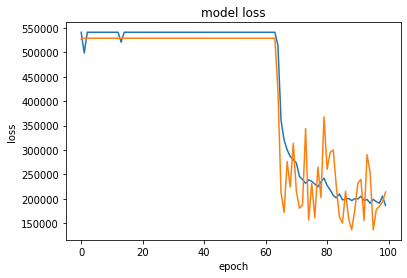

In [30]:
#loss_df = pd.DataFrame(model.history.history)
#loss_df.plot(figsize=(12,8))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()